In [43]:
import pandas as pd
import numpy as np
import plotly.express as px

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [44]:
data = pd.read_csv(
    "C:/Users/edmun/OneDrive/Desktop/2025-IMC-Global-Trading-Challenge/Backtest/resources/round0/prices_round_0_day_-2.csv",
    sep=";",
)

In [45]:
kelp = data[data["product"] == "KELP"].fillna(0)

In [46]:
kelp

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-1,0,KELP,2028,1,2026.0,2.0,2025.0,29.0,2029,31,0.0,0.0,0.0,0.0,2028.5,0.0
2,-1,100,KELP,2025,24,0.0,0.0,0.0,0.0,2028,2,2029.0,22.0,0.0,0.0,2026.5,0.0
5,-1,200,KELP,2025,22,0.0,0.0,0.0,0.0,2028,20,0.0,0.0,0.0,0.0,2026.5,0.0
6,-1,300,KELP,2025,31,0.0,0.0,0.0,0.0,2028,2,2029.0,29.0,0.0,0.0,2026.5,0.0
9,-1,400,KELP,2025,27,0.0,0.0,0.0,0.0,2028,27,0.0,0.0,0.0,0.0,2026.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,-1,199500,KELP,2020,23,0.0,0.0,0.0,0.0,2024,23,0.0,0.0,0.0,0.0,2022.0,0.0
3992,-1,199600,KELP,2020,22,0.0,0.0,0.0,0.0,2023,1,2024.0,21.0,0.0,0.0,2021.5,0.0
3995,-1,199700,KELP,2020,27,0.0,0.0,0.0,0.0,2023,2,2024.0,25.0,0.0,0.0,2021.5,0.0
3997,-1,199800,KELP,2020,21,0.0,0.0,0.0,0.0,2023,21,0.0,0.0,0.0,0.0,2021.5,0.0


In [47]:
kelp["mid_price"].diff().dropna()

2      -2.0
5       0.0
6       0.0
9       0.0
10      0.0
       ... 
3990    1.5
3992   -0.5
3995    0.0
3997    0.0
3998   -0.5
Name: mid_price, Length: 1999, dtype: float64

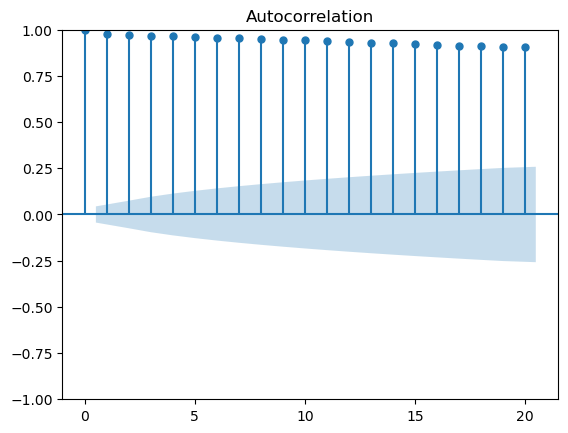

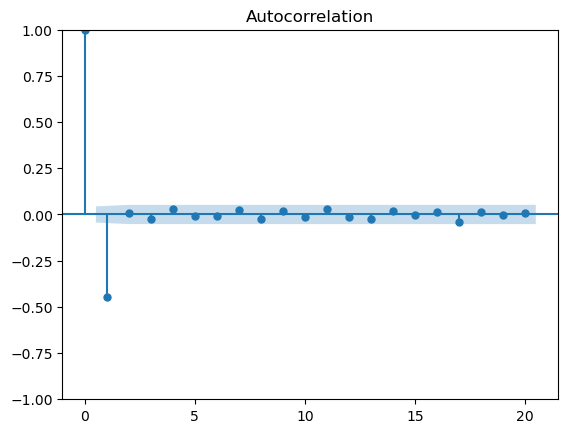

In [48]:
sm.graphics.tsa.plot_acf(kelp["mid_price"].values.squeeze(), lags=20)
sm.graphics.tsa.plot_acf(kelp["mid_price"].diff().dropna().values.squeeze(), lags=20);

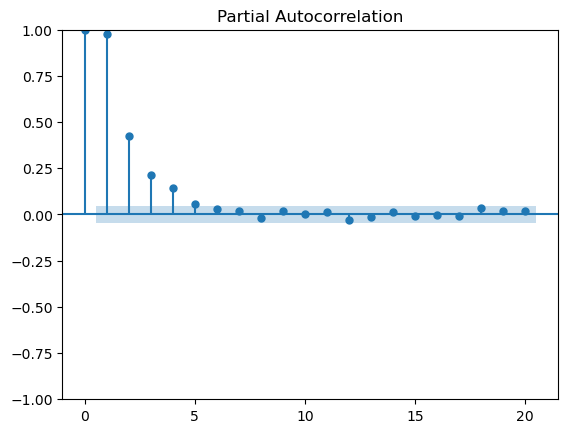

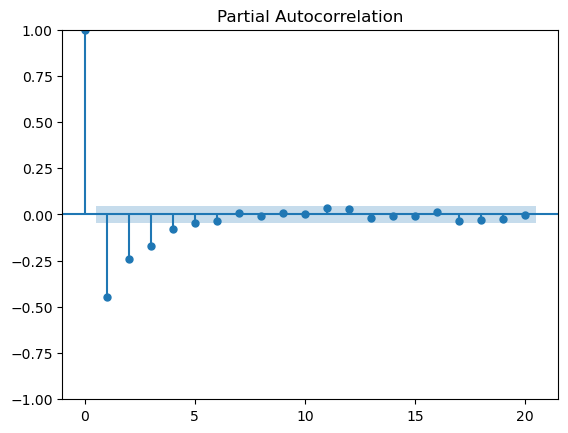

In [49]:
sm.graphics.tsa.plot_pacf(kelp["mid_price"].values.squeeze(), lags=20)
sm.graphics.tsa.plot_pacf(kelp["mid_price"].diff().dropna().values.squeeze(), lags=20);

In [50]:
arima = ARIMA(kelp["mid_price"].values, order=(0, 1, 1)).fit()
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2015.122
Date:                Sun, 02 Mar 2025   AIC                           4034.244
Time:                        01:04:56   BIC                           4045.445
Sample:                             0   HQIC                          4038.357
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6131      0.016    -37.491      0.000      -0.645      -0.581
sigma2         0.4396      0.012     36.205      0.000       0.416       0.463
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                34.63
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.05
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
micro_price = (
    kelp["ask_price_1"] * kelp["bid_volume_1"]
    + kelp["bid_price_1"] * kelp["ask_volume_1"]
) / (kelp["ask_volume_1"] + kelp["bid_volume_1"])

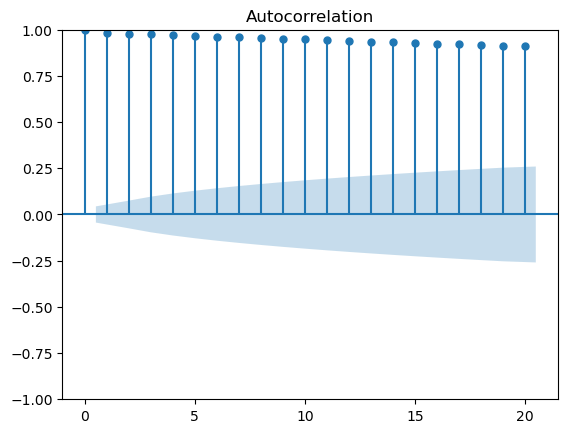

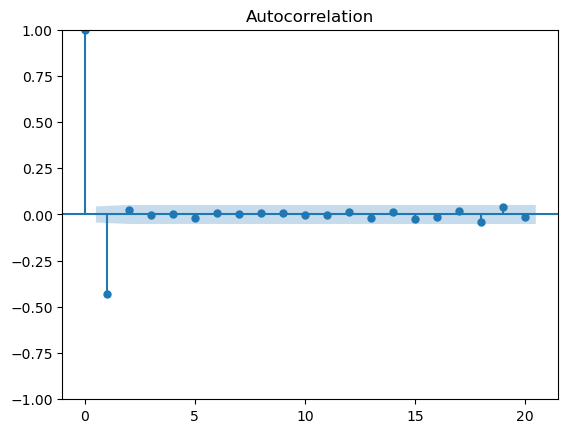

In [52]:
sm.graphics.tsa.plot_acf(micro_price.values.squeeze(), lags=20)
sm.graphics.tsa.plot_acf(micro_price.diff().dropna().values.squeeze(), lags=20);

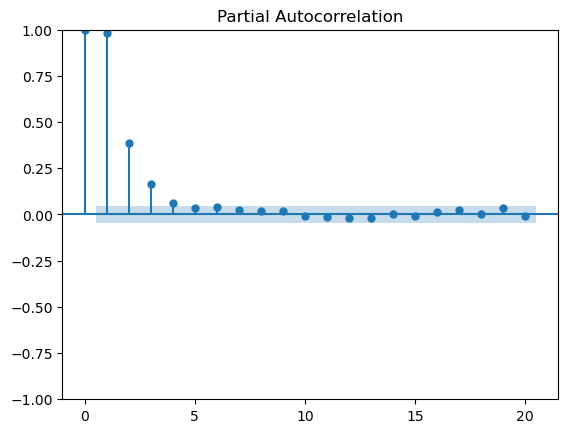

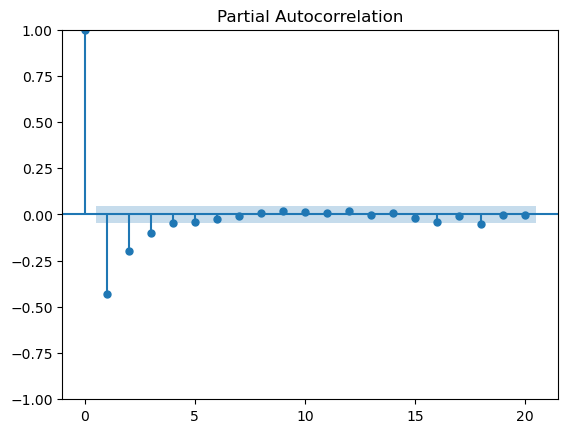

In [53]:
sm.graphics.tsa.plot_pacf(micro_price.values.squeeze(), lags=20)
sm.graphics.tsa.plot_pacf(micro_price.diff().dropna().values.squeeze(), lags=20);

In [54]:
micro_price_arima = ARIMA(micro_price.values, order=(0, 1, 1)).fit()
micro_price_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1715.014
Date:                Sun, 02 Mar 2025   AIC                           3434.028
Time:                        01:04:57   BIC                           3445.229
Sample:                             0   HQIC                          3438.141
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5327      0.016    -32.597      0.000      -0.565      -0.501
sigma2         0.3256      0.009     36.847      0.000       0.308       0.343
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                43.36
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.01
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2015.122
Date:                Sun, 02 Mar 2025   AIC                           4034.244
Time:                        01:04:57   BIC                           4045.445
Sample:                             0   HQIC                          4038.357
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6131      0.016    -37.491      0.000      -0.645      -0.581
sigma2         0.4396      0.012     36.205      0.000       0.416       0.463
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                34.63
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.05
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
micro_price_arima.params[0]

-0.5327064557792764

In [57]:
ask_vwap = (
    kelp["ask_price_1"] * kelp["ask_volume_1"]
    + kelp["ask_price_2"] * kelp["ask_volume_2"]
    + kelp["ask_price_3"] * kelp["ask_volume_3"]
) / (kelp["ask_volume_1"] + kelp["ask_volume_2"] + kelp["ask_volume_3"])

bid_vwap = (
    kelp["bid_price_1"] * kelp["bid_volume_1"]
    + kelp["bid_price_2"] * kelp["bid_volume_2"]
    + kelp["bid_price_3"] * kelp["bid_volume_3"]
) / (kelp["bid_volume_1"] + kelp["bid_volume_2"] + kelp["bid_volume_3"])

In [59]:
vwap_mid = (ask_vwap + bid_vwap) / 2

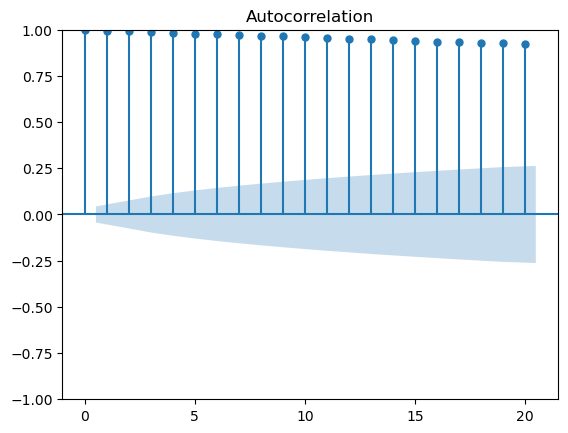

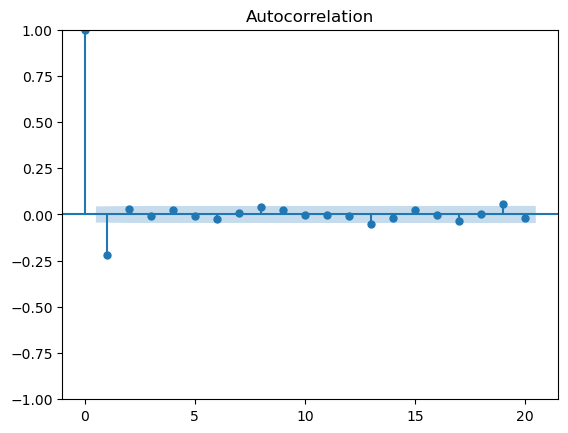

In [66]:
sm.graphics.tsa.plot_acf(vwap_mid.values.squeeze(), lags=20)
sm.graphics.tsa.plot_acf(vwap_mid.diff().dropna().values.squeeze(), lags=20);

In [67]:
vwap_mid_arima = ARIMA((bid_vwap + ask_vwap).values, order=(0, 1, 1)).fit()
vwap_mid_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1992.020
Date:                Sun, 02 Mar 2025   AIC                           3988.039
Time:                        01:09:21   BIC                           3999.240
Sample:                             0   HQIC                          3992.152
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2180      0.018    -12.157      0.000      -0.253      -0.183
sigma2         0.4296      0.010     42.751      0.000       0.410       0.449
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               238.04
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.18
Prob(H) (two-sided):                  0.05   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""